In [1]:
# class imbalance >> when one class has higher percentage:
# ways to handle: 
# >> Down Sampling
# >> Up Sampling
# >> SMOTE 

In [2]:
import pandas as pd 
import numpy as np

In [3]:
np.random.seed(1) # Reproduces the same random number. You get the same sequence of random numbers every time.

# Assistant
The selected code `np.random.seed(1)` is used to set the seed for NumPy's random number generator. Here's a step-by-step explanation:

1. `np.random` - This refers to the random module within the NumPy library, which provides functions for generating random numbers.

2. `seed(1)` - The `seed()` function initializes the random number generator with a specific seed value, in this case, `1`. 

3. **Purpose** - By setting the seed, you ensure that the sequence of random numbers generated by NumPy will be the same each time you run the code. This is useful for reproducibility, allowing you to get consistent results during testing or debugging.

In [5]:
no_of_samples = 1000

class0ratio = 0.9
class1ratio = 0.1

numberclass0 = int (no_of_samples*class0ratio)
numberclass1 = int (no_of_samples*class1ratio)

In [6]:
# Create a dictionary for class 0 data
class0 = {
    # Generate 'feature1' with a normal distribution (mean=0, std=1) for 'numberclass0' samples
    'feature1': np.random.normal(0, 1, numberclass0),
    
    # Generate 'feature2' with a normal distribution (mean=0, std=1) for 'numberclass0' samples
    'feature2': np.random.normal(0, 1, numberclass0),
    
    # Create a target list with 'numberclass0' entries, all set to 0 (indicating class 0)
    'target': [0] * numberclass0
}

In [7]:
# Create a dictionary for class 1 data
class1 = {
    # Generate 'feature1' with a normal distribution (mean=0, std=1) for 'numberclass0' samples
    'feature1': np.random.normal(0, 1, numberclass1),
    
    # Generate 'feature2' with a normal distribution (mean=0, std=1) for 'numberclass0' samples
    'feature2': np.random.normal(0, 1, numberclass1),
    
    # Create a target list with 'numberclass0' entries, all set to 0 (indicating class 0)
    'target': [1] * numberclass1
}

In [8]:
# Assistant
# Convert the variable 'class0' into a pandas DataFrame
class0 = pd.DataFrame(class0)

# Convert the variable 'class1' into a pandas DataFrame
class1 = pd.DataFrame(class1)

In [9]:
class0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [10]:
class1

,feature1,feature2,target
0,-1.307971,0.933630,1
1,1.472396,-1.763775,1
2,0.074876,-0.410217,1
3,-1.786935,-0.453667,1
4,0.165211,-0.589430,1
...,...,...,...
95,0.213026,0.188583,1
96,-0.804542,0.560918,1
97,-0.646582,-0.921659,1
98,1.138173,0.647375,1


In [11]:
df = pd.concat([class0,class1]).reset_index(drop=True)

In [12]:
df_minority = df[df.target==1]
df_majority = df[df.target==0]

In [13]:
df_minority

,feature1,feature2,target
900,-1.307971,0.933630,1
901,1.472396,-1.763775,1
902,0.074876,-0.410217,1
903,-1.786935,-0.453667,1
904,0.165211,-0.589430,1
...,...,...,...
995,0.213026,0.188583,1
996,-0.804542,0.560918,1
997,-0.646582,-0.921659,1
998,1.138173,0.647375,1


In [14]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [15]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True , n_samples=len(df_majority) ,random_state =1)

In [16]:
df_minority_upsampled

,feature1,feature2,target
937,-0.746224,-1.318523,1
912,-0.551680,-0.101381,1
972,-0.458302,-0.299153,1
909,-1.275114,-1.251957,1
975,-0.572026,1.613562,1
...,...,...,...
936,1.093307,-0.626457,1
998,1.138173,0.647375,1
901,1.472396,-1.763775,1
932,-1.034463,1.084419,1


In [17]:
# Resample the majority class dataframe to create a balanced dataset
# 'replace=True' allows for sampling with replacement
# 'n_samples=len(df_minority)' sets the number of samples to match the minority class size
# 'random_state=1' ensures reproducibility of the random sampling
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=1) 

In [18]:
df_majority_downsampled

,feature1,feature2,target
37,0.234416,0.949809,0
235,-1.233121,-0.438055,0
72,0.160037,-0.839989,0
767,0.237333,1.630906,0
715,1.498108,-1.899463,0
...,...,...,...
87,0.377564,0.932721,0
793,0.049080,-0.825654,0
243,-1.396620,-0.267004,0
348,0.461164,-0.227253,0


In [19]:
# SMOTE >> Synthetic Minority Oversampling
# This technique is used to address class imbalance in datasets
# by generating synthetic samples for the minority class.

In [20]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
# X: feature matrix, y: target labels
X, y = make_classification(
    n_samples=1000,        # Number of samples to generate
    n_redundant=0,         # Number of redundant features (0 means all features are informative)
    n_features=2,          # Total number of features (2 features in this case)
    n_clusters_per_class=1, # Number of clusters per class (1 cluster for each class)
    weights=[0.90]         # Class distribution (90% of samples belong to one class)
)

In [21]:
df1 = pd.DataFrame( X , columns=['f1', 'f2'])
df2 = pd.DataFrame(y , columns=['Target'])
final_df = pd.concat([df1,df2],axis=1)

In [22]:
import matplotlib.pyplot as plt

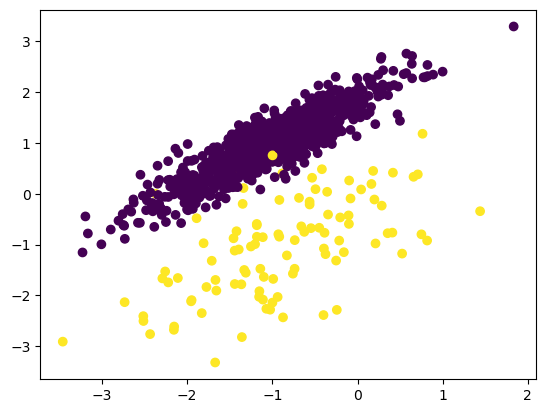

In [23]:
# Create a scatter plot using the values from the 'f1' and 'f2' columns of the final_df DataFrame
# The color of the points is determined by the 'Target' column in the final_df DataFrame

plt.scatter(final_df.f1, final_df.f2, c=final_df.Target)

In [24]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE  # Import the SMOTE class from the imbalanced-learn library

oversample = SMOTE()  # Create an instance of the SMOTE class for oversampling

# Apply the SMOTE algorithm to the features and target variable
# 'final_df[['f1','f2']]' represents the feature set
# 'final_df['Target']' represents the target variable

X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['Target'])  # Perform oversampling and store the results in X and y

In [26]:
df1 = pd.DataFrame( X , columns=['f1', 'f2'])
df2 = pd.DataFrame(y , columns=['Target'])
smote_df = pd.concat([df1,df2],axis=1)

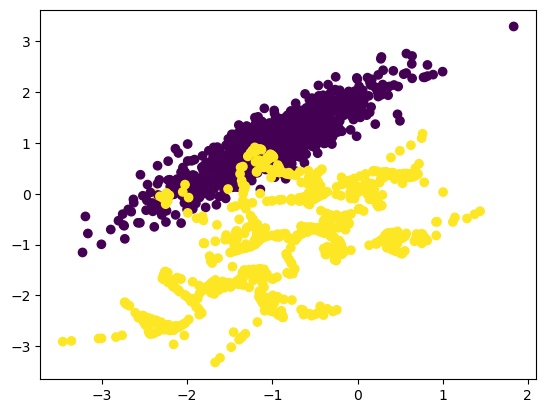

In [27]:
plt.scatter(smote_df.f1, smote_df.f2, c=smote_df.Target)